# Spatial Sampling (point generation)

The focus of this practice is on spatial sampling methods where the goal is to sample point locations from continuous space.

In [1]:
# Load relevant R packages
inLibraries = list('repr','rgdal','sp','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){           
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

Warning message:
"package 'rgdal' was built under R version 3.4.2"Warning message:
"package 'sp' was built under R version 3.4.2"Warning message:
"package 'rgeos' was built under R version 3.4.2"

In [2]:
# Read in shp file
counties <- readOGR("datasets/mo_counties","st_county10")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/mo_counties", layer: "st_county10"
with 115 features
It has 46 fields
Integer64 fields read as strings:  POP90 WHITE90 BLACK90 ASIANPI90 AMIND90 OTHER90 HISP90 POP00 WHITE00 BLACK00 ASIAN00 AMIND00 HAWNPI00 OTHER00 MULTRA00 HISP00 POP10 WHITE10 BLACK10 ASIAN10 AMIND10 HAWNPI10 OTHER10 MULTRA10 HISP10 


In [3]:
# Summarize attributes of shp file
summary(counties)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min     max
x  265131.4  847373
y 3986649.6 4496645
Is projected: TRUE 
proj4string :
[+proj=utm +zone=15 +datum=NAD83 +units=m +no_defs +ellps=GRS80
+towgs84=0,0,0]
Data attributes:
 STATEFP10   COUNTYFP10     COUNTYNS10     GEOID10          NAME10   
 29:115    001    :  1   00758456:  1   29001  :  1   St. Louis:  2  
           003    :  1   00758457:  1   29003  :  1   Adair    :  1  
           005    :  1   00758458:  1   29005  :  1   Andrew   :  1  
           007    :  1   00758459:  1   29007  :  1   Atchison :  1  
           009    :  1   00758460:  1   29009  :  1   Audrain  :  1  
           011    :  1   00758461:  1   29011  :  1   Barry    :  1  
           (Other):109   (Other) :109   (Other):109   (Other)  :108  
           NAMELSAD10  LSAD10   CLASSFP10  MTFCC10    CSAFP10      CBSAFP10 
 Adair County   :  1   06:114   C7:  1    G4020:115   164 : 3   28140  : 9  
 Andrew County  :  1   25:  1   H1:114   

In [4]:
peek <- head(counties@data, 3)

t(peek)

,0,1,2
STATEFP10,29,29,29
COUNTYFP10,045,005,199
COUNTYNS10,00758477,00758457,00758552
GEOID10,29045,29005,29199
NAME10,Clark,Atchison,Scotland
NAMELSAD10,Clark County,Atchison County,Scotland County
LSAD10,06,06,06
CLASSFP10,H1,H1,H1
MTFCC10,G4020,G4020,G4020
CSAFP10,NA,NA,NA


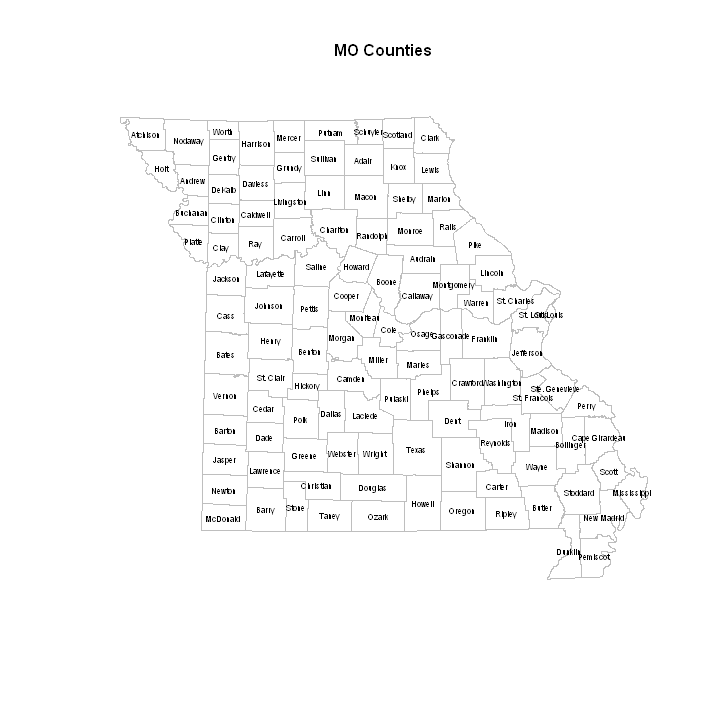

In [5]:
# Map input data
plot(counties, col = "white", border = "gray", 
             main = "MO Counties", cex.main = 0.8)

# Get centroid of polygons
centroids <- gCentroid(counties, byid=TRUE)
centroidLons <- coordinates(centroids)[,1]
centroidLats <- coordinates(centroids)[,2]

#label county polygons
text(centroidLons, centroidLats, 
         labels = counties$NAME10, cex = 0.4)

## Sampling

Now that we have the data imported and visualized, it is time to experiment different sampling methods. The spsample() function (sp library) can be used to support this type of sampling. spsample() can be used to select points from within a region of interest.  It requires the type of sampling (i.e. random), an extent, area, line, or raster from which sample points are to be drawn as well as the number of samples needed.

### Random Sampling

Random sampling involves selecting locations within an area without any systematic influence. Let's select 200 random points within the state.

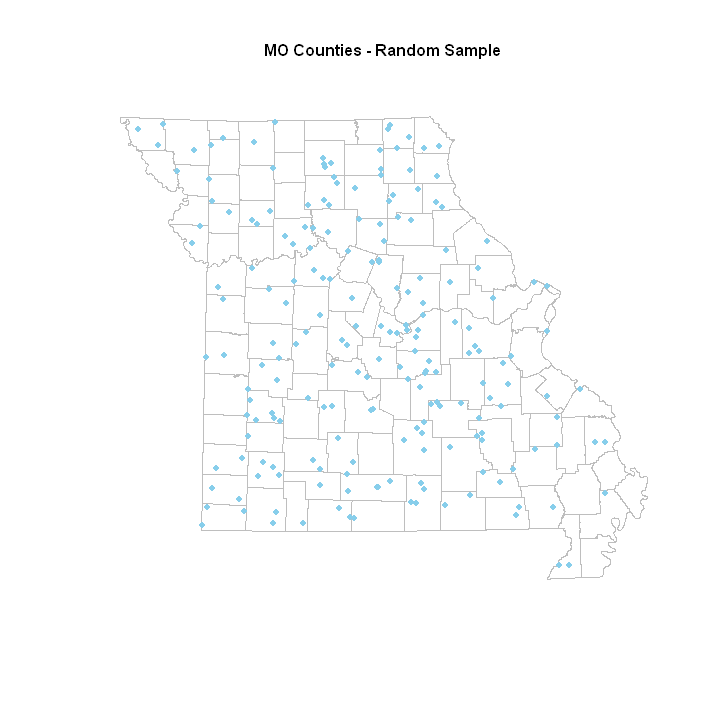

In [6]:
# Specify sample size
n <- 200

# Draw samples randomly
samp.rand <- spsample(counties, n, type = "random")

#Draw the sampeling area and add sample points
plot(counties, border = "gray", 
         main = "MO Counties - Random Sample", 
         cex.main = 0.8)

points(samp.rand, pch = 20, col = "skyblue")

#### Random - for a specific subregion

What if we'd like to draw a sample from within a specific county? To do this, simply select a county and then randomly sample from that county. In the example below, Audrain county is selected.

In [7]:
# Specify sample size
n <- 200

#select a county
selCounty <- counties[counties@data$NAME10 == 'Audrain', ]

# Draw samples randomly
samp.rand <- spsample(selCounty, n, type="random")

head(samp.rand)

SpatialPoints:
            x       y
[1,] 603046.1 4328080
[2,] 578816.7 4348056
[3,] 598933.4 4338555
[4,] 584048.9 4342204
[5,] 601831.3 4337448
[6,] 577246.9 4336277
Coordinate Reference System (CRS) arguments: +proj=utm +zone=15
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 

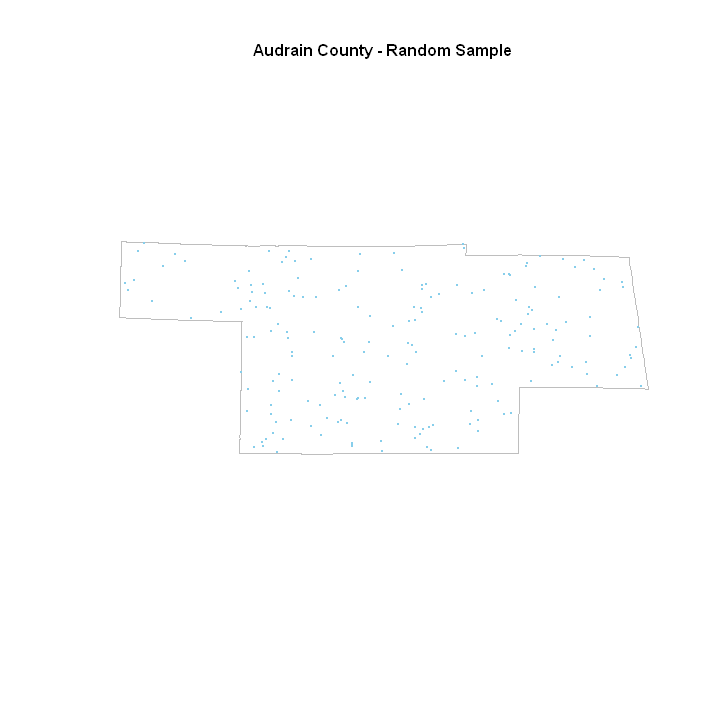

In [8]:
#Draw sampling area and sampled points
plot(selCounty, border = "gray", 
         main = "Audrain County - Random Sample", 
         cex.main = 0.8)

points(samp.rand, pch = 20, cex = 0.1, col = "skyblue")

### Regular sampling

In regular systematic sampling, the samples are taken systematicly such that an initial starting point is randomly selected and then other sample points are located at some interval from the starting point. 

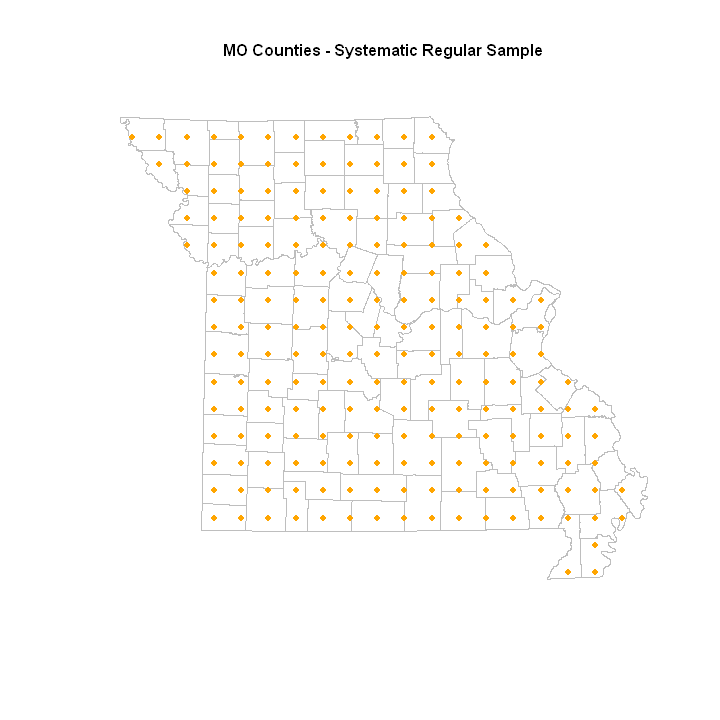

In [9]:
# Specify sample size
n <- 200

#draw a regular sample
samp.reg <- spsample(counties, n, type = "regular")

# Draw the sampling area and add sample points
plot(counties, border = "gray", 
         main = "MO Counties - Systematic Regular Sample", cex.main = 0.8)

points(samp.reg, pch = 20, col = "orange")

#### Systematic Sample from a specific area

A regular systematic sample can also be drawn from a subarea as follows. In this example, Texas county is first selected and then systematically sampled.

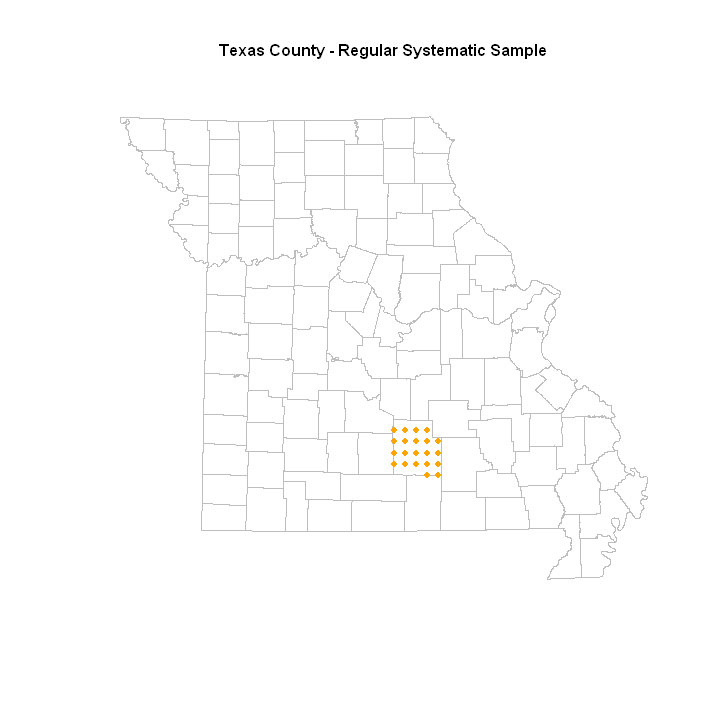

In [10]:
# Specify sample size
n <- 20

#select county
selCounty <- counties[counties@data$NAME10 == 'Texas',]

#draw a regular sample
samp.reg <- spsample(selCounty, n, type="regular")

# Draw the sampling area and add sample points
plot(counties, border="gray",main="Texas County - Regular Systematic Sample",cex.main=.8)
points(samp.reg, pch=20,col="orange")

#### Stratified Sampling - distance specified

Regular sampling can also be conducted by specifying a sampling distance between samples. spsample() refers to this distance as 'cellsize'. For example, if one wished to sample a point every 50,000m in the state, cellsize=50000. Whenever a cellsize is used, the number of samples to be drawn is ignored.

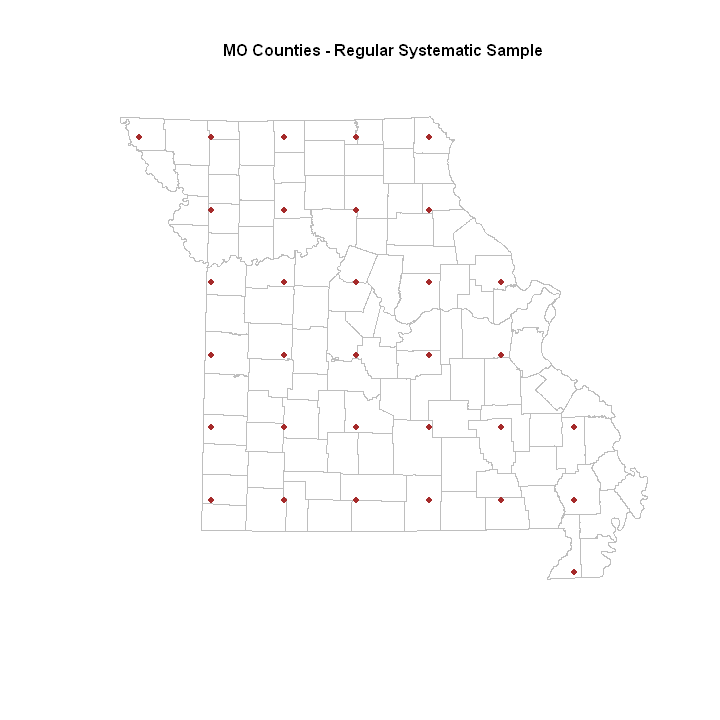

In [12]:
# Since the crs is in meters (see data summary above), 
# the intervals too must be specified in meters (50 km=50000).
# draw a regular sample

samp.reg <- spsample(counties, 
                         type = "regular", 
                         cellsize = 80000)

# Draw the sampling area and add sample points
plot(counties, border = "gray", 
         main = "MO Counties - Regular Systematic Sample", 
         cex.main = 0.8)

points(samp.reg, pch = 20, col = "brown")

### Regular Non-systematic Sampling

Regular sampling doesn't always have to be systematic.  That is, it can be based on irregular set of points. Try out the 'nonaligned' option for spsample().

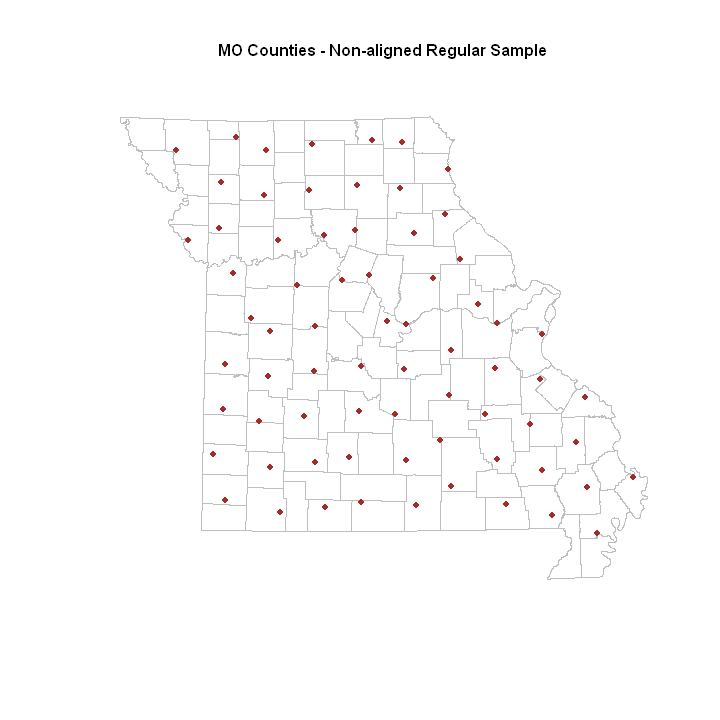

In [13]:
# Since the crs is in meters (see data summary above), the intervals too must be specefied in meters (50 km=50000).
#draw a nonaligned regular sample
samp.reg <- spsample(counties, type = "nonaligned", cellsize = 50000)

# Draw the sampling area and add sample points
plot(counties, border = "gray", 
             main = "MO Counties - Non-aligned Regular Sample", 
             cex.main = 0.8)

points(samp.reg, pch = 20, col = "brown")

### Cluster sampling

In cluster sampling, a specified number of locations are first sampled.  Then for each of the selected features, samples are randomly selected. spsample() requires the total number of samples to be drawn as well as the number of clusters to be sampled.

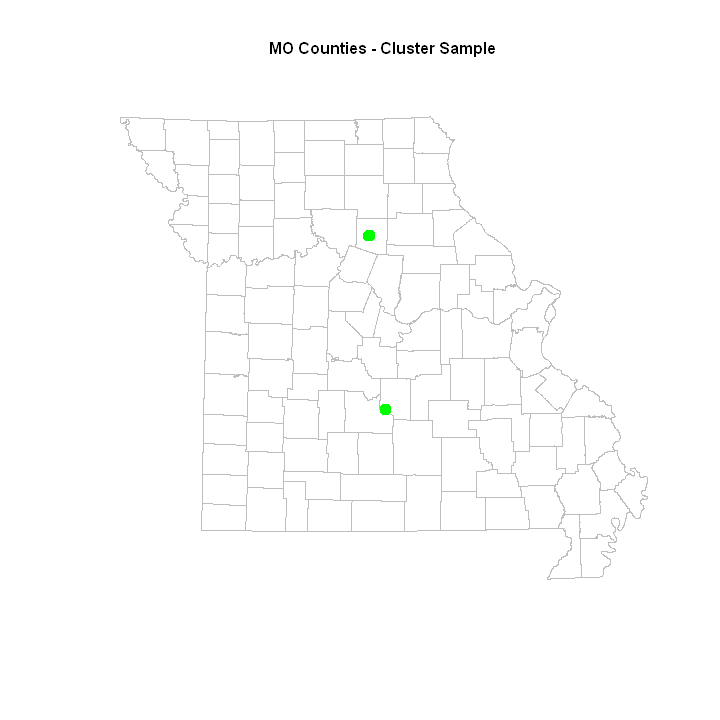

In [14]:
# Specify sample size
n <- 5000

# draw a clustered sample
samp.reg <- spsample(counties, n, type = "clustered", nclusters = 5)

# Draw the sampling area and add sample points
plot(counties, border = "gray", 
             main = "MO Counties - Cluster Sample", 
             cex.main = 0.8)

points(samp.reg, pch = 20, col = "green")

#### Cluster Sample for Subregion


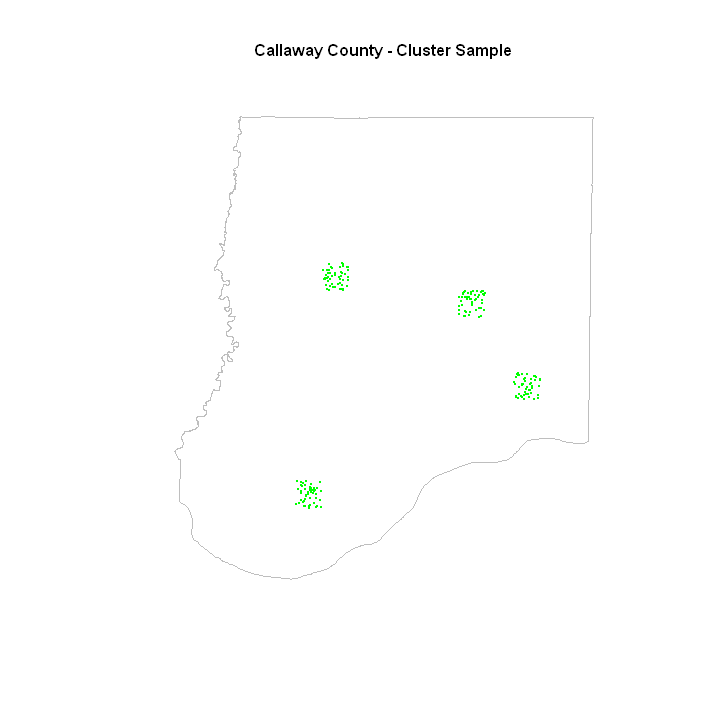

In [15]:
# Specify sample size
n <- 200

#select county
selCounty <- counties[counties@data$NAME10 == 'Callaway',]

# draw a clustered sample
samp.reg <- spsample(selCounty, n, type = "clustered", 
                         nclusters = 5, 
                         iter = 4)

# Draw the sampling area and add sample points
plot(selCounty, border = "gray", 
         main = "Callaway County - Cluster Sample", 
         cex.main = 0.8)

points(samp.reg, pch = 20, cex = 0.1, col = "green")